In [2]:
import pandas
import numpy as np
# matplotlib inline
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
names = ['Sequence Name','mcg', 'gvh', 'alm', 'mit', 'erl','pox','vac','nuc','class']
dataset = pandas.read_csv(url, names=names, delim_whitespace=True)

In [4]:
print(dataset.shape)

(1484, 10)


In [5]:
print(dataset.head(10))

  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
5    AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22   CYT
6    ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.0  0.53  0.22   MIT
7    BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34   NUC
8    ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.0  0.49  0.22   MIT
9    ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.0  0.58  0.30   CYT


In [6]:
#descriptions
print(dataset.describe())
#class distribution
print(dataset.groupby('class').size())

               mcg          gvh  ...          vac          nuc
count  1484.000000  1484.000000  ...  1484.000000  1484.000000
mean      0.500121     0.499933  ...     0.499885     0.276199
std       0.137299     0.123924  ...     0.057797     0.106491
min       0.110000     0.130000  ...     0.000000     0.000000
25%       0.410000     0.420000  ...     0.480000     0.220000
50%       0.490000     0.490000  ...     0.510000     0.220000
75%       0.580000     0.570000  ...     0.530000     0.300000
max       1.000000     1.000000  ...     0.730000     1.000000

[8 rows x 8 columns]
class
CYT    463
ERL      5
EXC     35
ME1     44
ME2     51
ME3    163
MIT    244
NUC    429
POX     20
VAC     30
dtype: int64


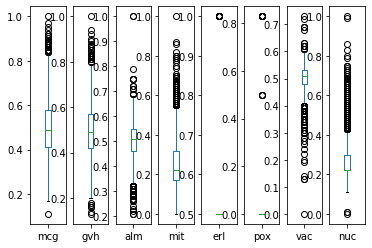

In [7]:
dataset.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

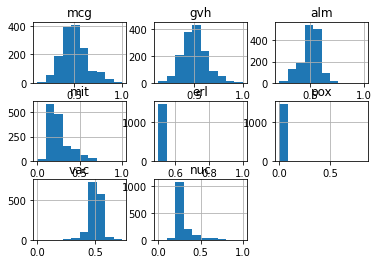

In [8]:
dataset.hist()
plt.show()

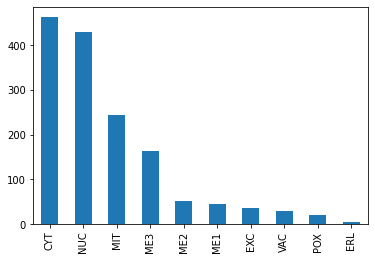

In [9]:
dataset['class'].value_counts().plot.bar()

In [10]:
print('Proportion of the classes:')
print(dataset['class'].value_counts() / len(dataset))

Proportion of the classes:
CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: class, dtype: float64


In [11]:
array = dataset.values
X = array[:,1:9]
Y = array[:,9]
validation_size = 0.025
seed = 7
#data division and mixing
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print (X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)

(1446, 8) (38, 8) (1446,) (38,)


In [12]:
seed = 7

models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))

In [13]:
results = []
names = []
i=0
for name, model in models:
      
	kfold = model_selection.KFold(n_splits=30, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
	results.append(cv_results)
	names.append(name)
	print ("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.517531 (0.063608)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.602324 (0.068131)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.559453 (0.062915)
GNB: 0.151545 (0.059964)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


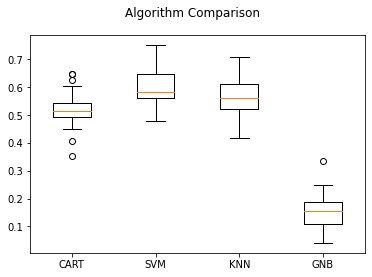

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5
[[5 0 0 0 3 3]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [1 0 0 5 1 0]
 [1 1 1 0 4 0]
 [6 0 0 0 0 5]]
              precision    recall  f1-score   support

         CYT       0.38      0.45      0.42        11
         EXC       0.00      0.00      0.00         0
         ME2       0.00      0.00      0.00         2
         ME3       0.83      0.71      0.77         7
         MIT       0.44      0.57      0.50         7
         NUC       0.62      0.45      0.53        11

    accuracy                           0.50        38
   macro avg       0.38      0.37      0.37        38
weighted avg       0.53      0.50      0.51        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5526315789473685
[[8 0 0 2 1]
 [0 0 1 1 0]
 [1 0 4 1 1]
 [2 1 0 4 0]
 [6 0 0 0 5]]
              precision    recall  f1-score   support

         CYT       0.47      0.73      0.57        11
         ME2       0.00      0.00      0.00         2
         ME3       0.80      0.57      0.67         7
         MIT       0.50      0.57      0.53         7
         NUC       0.71      0.45      0.56        11

    accuracy                           0.55        38
   macro avg       0.50      0.46      0.47        38
weighted avg       0.58      0.55      0.55        38



In [17]:
cart = DecisionTreeClassifier() 
cart.fit(X_train, Y_train.ravel()) 
predictions = cart.predict(X_validation) 

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4473684210526316
[[7 0 1 2 1]
 [0 1 0 1 0]
 [0 0 4 1 2]
 [2 1 0 2 2]
 [6 0 2 0 3]]
              precision    recall  f1-score   support

         CYT       0.47      0.64      0.54        11
         ME2       0.50      0.50      0.50         2
         ME3       0.57      0.57      0.57         7
         MIT       0.33      0.29      0.31         7
         NUC       0.38      0.27      0.32        11

    accuracy                           0.45        38
   macro avg       0.45      0.45      0.45        38
weighted avg       0.44      0.45      0.44        38



In [18]:
gnb = GaussianNB()
gnb.partial_fit(X_train, Y_train, np.unique(Y_train))
predictions = gnb.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.07894736842105263
[[ 0  1  0  0  1  1  8]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  7]
 [ 0  2  0  0  2  0  3]
 [ 0  0  0  0  0  1 10]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00        11
         EXC       0.00      0.00      0.00         0
         ME2       0.00      0.00      0.00         2
         ME3       0.00      0.00      0.00         7
         MIT       0.67      0.29      0.40         7
         NUC       0.50      0.09      0.15        11
         VAC       0.00      0.00      0.00         0

    accuracy                           0.08        38
   macro avg       0.17      0.05      0.08        38
weighted avg       0.27      0.08      0.12        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='regular',k_neighbors=4)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
X_train_new, Y_train_new = sm.fit_sample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

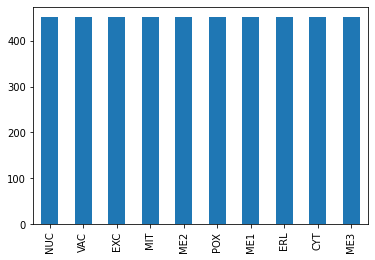

In [21]:
# observe that data has been balanced
pandas.Series(Y_train_new).value_counts().plot.bar()

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train_new, Y_train_new)
predictions_sm = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions_sm))
print(confusion_matrix(Y_validation, predictions_sm))
print(classification_report(Y_validation, predictions_sm))

0.5
[[4 0 0 2 2 2 1]
 [0 1 1 0 0 0 0]
 [0 0 6 1 0 0 0]
 [1 1 0 4 0 1 0]
 [4 0 0 0 4 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         CYT       0.44      0.36      0.40        11
         ME2       0.50      0.50      0.50         2
         ME3       0.86      0.86      0.86         7
         MIT       0.57      0.57      0.57         7
         NUC       0.67      0.36      0.47        11
         POX       0.00      0.00      0.00         0
         VAC       0.00      0.00      0.00         0

    accuracy                           0.50        38
   macro avg       0.43      0.38      0.40        38
weighted avg       0.61      0.50      0.54        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
svm = SVC()
svm.fit(X_train_new, Y_train_new)
predictions_sm = svm.predict(X_validation)

print(accuracy_score(Y_validation, predictions_sm))
print(confusion_matrix(Y_validation, predictions_sm))
print(classification_report(Y_validation, predictions_sm))

0.5789473684210527
[[7 1 0 2 1 0]
 [0 2 0 0 0 0]
 [0 1 4 0 1 1]
 [1 2 0 4 0 0]
 [3 0 0 0 5 3]
 [0 0 0 0 0 0]]
              precision    recall  f1-score   support

         CYT       0.64      0.64      0.64        11
         ME2       0.33      1.00      0.50         2
         ME3       1.00      0.57      0.73         7
         MIT       0.67      0.57      0.62         7
         NUC       0.71      0.45      0.56        11
         VAC       0.00      0.00      0.00         0

    accuracy                           0.58        38
   macro avg       0.56      0.54      0.51        38
weighted avg       0.72      0.58      0.62        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
cart = DecisionTreeClassifier() 
cart.fit(X_train_new, Y_train_new) 
predictions_sm = cart.predict(X_validation) 

print(accuracy_score(Y_validation, predictions_sm))
print(confusion_matrix(Y_validation, predictions_sm))
print(classification_report(Y_validation, predictions_sm))

0.47368421052631576
[[6 1 0 2 2 0 0]
 [0 0 1 0 0 0 1]
 [0 0 5 1 1 0 0]
 [2 1 0 2 1 1 0]
 [3 0 0 1 5 0 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         CYT       0.55      0.55      0.55        11
         ME2       0.00      0.00      0.00         2
         ME3       0.83      0.71      0.77         7
         MIT       0.33      0.29      0.31         7
         NUC       0.56      0.45      0.50        11
         POX       0.00      0.00      0.00         0
         VAC       0.00      0.00      0.00         0

    accuracy                           0.47        38
   macro avg       0.32      0.29      0.30        38
weighted avg       0.53      0.47      0.50        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
gnb = GaussianNB()
gnb.partial_fit(X_train_new, Y_train_new, np.unique(Y_train_new))
predictions_sm = gnb.predict(X_validation)

print(accuracy_score(Y_validation, predictions_sm))
print(confusion_matrix(Y_validation, predictions_sm))
print(classification_report(Y_validation, predictions_sm))

0.07894736842105263
[[ 0  0  0  0  0  1  1  9]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  7]
 [ 0  1  1  0  0  2  0  3]
 [ 0  0  0  0  0  0  1 10]
 [ 0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00        11
         EXC       0.00      0.00      0.00         0
         ME1       0.00      0.00      0.00         0
         ME2       0.00      0.00      0.00         2
         ME3       0.00      0.00      0.00         7
         MIT       0.67      0.29      0.40         7
         NUC       0.50      0.09      0.15        11
         VAC       0.00      0.00      0.00         0

    accuracy                           0.08        38
   macro avg       0.15      0.05      0.07        38
weighted avg       0.27      0.08      0.12        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
